[![](https://colab.research.google.com/assets/colab-badge.svg "Open in Colab button")](https://colab.research.google.com/github/butchtm/geowrangler2/blob/main/nbs/00_core.ipynb)

In [1]:
#| default_exp core

In [2]:
#| hide
# colab package install 
# replace this next line with package install (if published)
![ -d /content ] && pip install -Uqq git+https://github.com/butchtm/geowrangler2.git
# replace this next line with dev dependencies (remove extraneous packages already in default colab environment)
![ -d /content ] && pip install -Uqq nbdev nbdime ipytest branca folium mapclassify

In [3]:
#| hide
# mkdir ../data dir if not yet existing
!mkdir -p ../data
# link data dir into current dir for easier viewing if in colab 
![ -d /content ] && ln -s ../data 

In [4]:
#| hide
# download data if not yet downloaded
![ ! -e ../data/region34ncr_admin.geojson ] && curl -s -o ../data/region34ncr_admin.geojson https://raw.githubusercontent.com/thinkingmachines/geowrangler/master/data/region34ncr_admin.geojson

In [5]:
#| hide
from nbdev.showdoc import *

In [6]:
#| hide
import ipytest
import pytest

In [7]:
#| hide
ipytest.autoconfig()

## Objectives
* Make it easy to maintain code by placing source inside notebooks
  - view, explore, debug code within the notebook.
  - can optionally display source code in documentation
* Provide good API documentation
  - nice API documentation always kept in sync via auto doc generation
  - easily check if doc is in sync or if code still runs
  - tutorials can be run as notebooks locally or run in Google Colab in one click
* Make it easy to add explanations as to what the code is doing
* Add `pytest`-like tests using `ipytest` package
* Split class methods into their method sections using `fastcore.patch` decorator
  - each class method can be extensively be explained and tested in their section
* Additional explanations can be added in the end

## Module API

In [8]:
#| exporti
import requests
import pandas as pd
import geopandas as gpd
import numpy as np
from fastcore.all import patch

In [9]:
#| export

def foo(
    bar:str='baz' # input string
) -> str: # return same input string or 'baz' by default
    """
    Function that returns the value of the input argument.

    Parameters:
    
    bar (str): Input string. Defaults to 'baz'.

    Returns:
    
    str: The input string.
    """
    return bar

#### `foo` tests

* A simple assert check
    - Using `assert` in a test 

In [10]:
def test_assert_values():
    assert  1 == 1

* A more extensive test of `foo` functions!
  - test that default value for no arg call is `baz`
  - test that using the first positional var returns the same value
  - test that using the kwarg `bar` returns the kwarg.

In [11]:
def test_foo():
    assert foo() == "baz"
    assert foo("bar") == "bar"
    assert foo(bar="foo") == "foo"

Example where `bar` shows source included in doc

In [12]:
#| exports
def bar(
    foo:str='baz' # input string
) -> str: # return same input string or 'baz' by default
    """
    Function that returns the value of the input argument.

    Parameters:
    
    foo (str): Input string. Defaults to 'baz'.

    Returns:
    
    str: The input string.
    """
    return foo

####  `bar` tests

* A more extensive test of `bar` functions!
  - test that default value for no arg call is `baz`
  - test that using the first positional var returns the same value
  - test that using the kwarg `foo` returns the kwarg.

In [13]:
def test_bar():
    assert bar() == "baz"
    assert bar("bar") == "bar"
    assert bar(foo="foo") == "foo"

In [14]:
#| export
class Dummy:
    """Dummy class example

       Dummy class example for documentation purposes. Goal is to showcase how to split class methods into their own sections

       Parameters:
       
       args(list): list of args
       
       kwargs(dict): dict of kwargs
    """
    def __init__(self, 
                 *args:[], # list of args 
                 **kwargs:dict, # dict of kwargs
                ):
        self.args = args
        self.kwargs = kwargs
        

In [15]:
#| export
@patch
def dummyfoo(self:Dummy, 
             bar:str='baz', # input string
            ) -> str: # return the input string
    """
    Method that returns the value of the input argument.

    Parameters:
    bar (str): Input string. Defaults to 'baz'.

    Returns:
    str: The input string.
    """
    return bar

#### `Dummy.dummyfoo` tests

In [16]:
@pytest.fixture
def dummy():
    yield Dummy() 

In [17]:
def test_dummyfoo(dummy):
    assert dummy.dummyfoo() == "baz"
    assert dummy.dummyfoo("bar") == "bar"
    assert dummy.dummyfoo(bar="foo") == "foo"    

In [18]:
#| hide
ipytest.run(raise_on_error=True)

....                                                                                         [100%]
4 passed in 0.01s


<ExitCode.OK: 0>

## Additional Explanations

A sample exposition of code including explanatory graphs

In [19]:
# always separate imports from rest of code
import geopandas as gpd
from pathlib import Path
import matplotlib.pyplot as plt

In [20]:
regionfile = Path('../data/region34ncr_admin.geojson'); 
regionfile.exists()

True

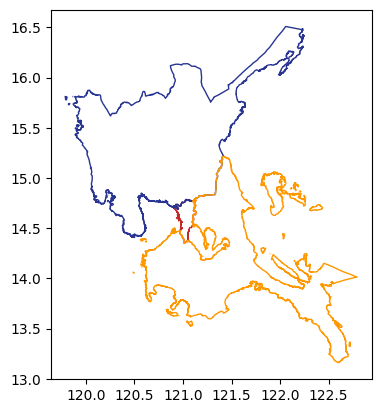

In [21]:
if regionfile.exists():
    aoi = gpd.read_file(regionfile)
    aoi.plot(
    ax=plt.axes(),
    facecolor="none",
    edgecolor=[
        "#C62828",
        "#283593",
        "#FF9800",
    ],);